## 1 Plotting Data

Today, we're going to perform tests of correlation and statistical significance between variables in our data set. Before we do so, it can be helpful to visualize data by creating graphs.

In [1]:
#Call our libraries
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns
#Note that the two libraries above are new in this notebook

#from datascience import *

pd.options.display.float_format = '{:.2f}'.format

In [2]:
# This should look familiar - I'm reading in the csv file with extracted CHIS data from last week.
chis_df = pd.read_csv("chis_extract.csv")

In [3]:
# Just like last week, we want to begin by renaming our variables into something that makes more sense
chis_df.rename(columns={"ac11":"number_sodas","povll":"poverty_line",
"ab1":"health",
"racedf_p1":"race_eth",
"ak28":"feel_safe",
"ak25":"tenure",
"ak10_p":"earnings",
"ak22_p1":"hh_income"}, inplace=True)

# Also like last week, we  want to convert the "earnings" variable to a float
chis_df["earnings"]=pd.to_numeric(chis_df["earnings"], errors="coerce")

# type in the code to look at the data
chis_df.head()

,number_sodas,poverty_line,health,race_eth,feel_safe,tenure,earnings,hh_income
0,0.00,200-299% FPL,VERY GOOD,NON-LATINO WHITE,MOST OF THE TIME,RENT,nan,"20,000-29,999"
1,0.00,300% FPL AND ABOVE,VERY GOOD,NON-LATINO WHITE,MOST OF THE TIME,OWN,nan,"120,000-129,000"
2,0.00,300% FPL AND ABOVE,FAIR,NON-LATINO WHITE,ALL OF THE TIME,RENT,nan,"80,000-89,999"
3,2.00,100-199% FPL,VERY GOOD,NON-LATINO WHITE,ALL OF THE TIME,OWN,nan,"30,000-39,999"
4,0.00,300% FPL AND ABOVE,FAIR,NON-LATINO WHITE,SOME OF THE TIME,OWN,3000.00,"90,000-99,999"


### 1.1 Creating a Histogram

One technique for understanding our data is to create a histogram that shows the distribution of values for a given variable. How many survey respondents identified as each racial/ ethnic category? What is the distribution of households within each income bracket? We'll start by answering the first question.

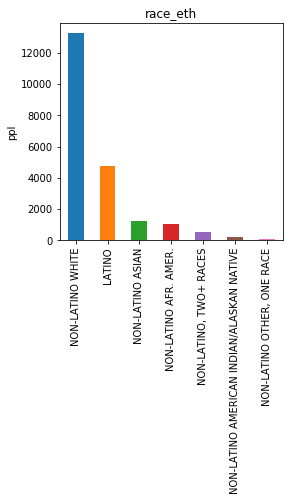

In [4]:
# This code  creates a bar plot using the "matplotlib" library.
# We assign the commands specific to this plot to a function titled "fig1".
# Now we can simply call on this function to create the figure at any time. Run the code and see what results!

plt.figure(figsize=(4,4))
plt.title("race_eth")
plt.ylabel("ppl")
chis_df['race_eth'].value_counts().plot(kind='bar')

In [5]:
# This is not the most beautiful graph, and the size and titles make it difficult to interpret.

# Copy the code from the cell above here, but this time edit some of the values to make it easier to read.
# For example, change the numbers in the line "plt.figure(figsize=(4,4))" until the plot fills your screen.
# Edit the y-axis label and chart title so that an outside audience could understand them.


Text(0.5, 0, 'Race / Ethnicity')

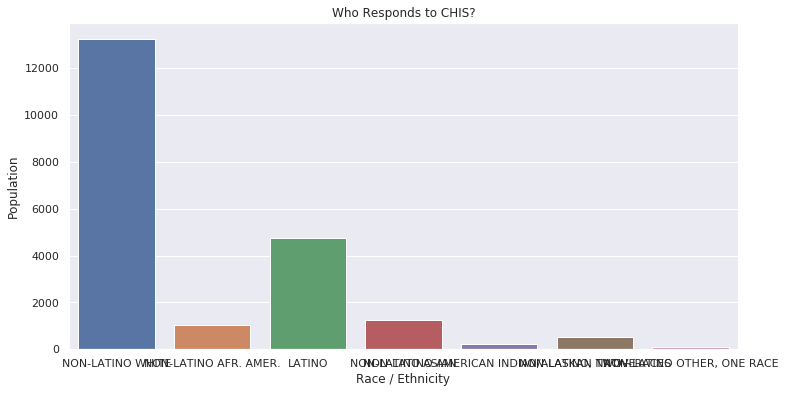

In [6]:
# We can also use the "Seaborn" library to create slightly prettier plots.
# The code below creates a similar histogram for the "race_eth" variable

sns.set()
plt.figure(figsize=(12,6))
plt.title("Who Responds to CHIS?")
#plt.xticks(rotation=90)
sns.countplot(chis_df['race_eth'])
plt.ylabel("Population")
plt.xlabel("Race / Ethnicity")

In [ ]:
# What problem do you notice? It's impossible to read the x-axis labels!
# You can fix this by removing the "#" in front of the line plt.xticks(rotation=90) and running the code again

# Try editing the number so that the x-axis labels are at an angle and take up less space


### 1.2 Creating a Scatterplot

If we want to investigate the relationship between two numerical variables, it can help to create a scatter plot of them. Let's look at household income and soda consumption to see if there is a visible trend in the data.

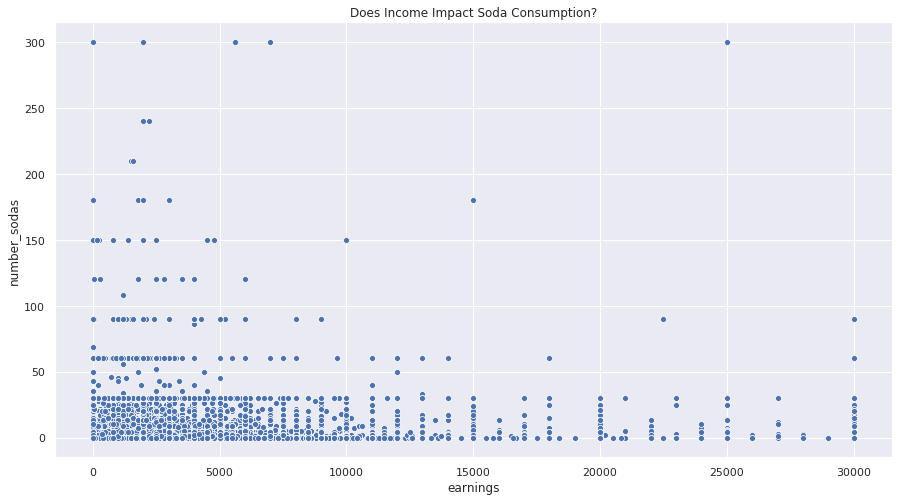

In [7]:
# This code creates a scatterplot with number of sodas on the y-axis and earnings on the x-axis

plt.figure(figsize=(15, 8))
plt.title("Does Income Impact Soda Consumption?")
plt.xlabel("Earnings ($)")
plt.ylabel("Sodas per month")
ax = sns.scatterplot(x="earnings", y="number_sodas", data=chis_df)

### 1.3 Dropping Values

Can you see a pattern in the data above? Maybe, but it's really difficult because there are some outliers who reported drinking as much as 300 sodas/ month. If we drop some observations from our data set to exclude outliers we should be able to see a nicer looking scatterplot.

In [8]:
# The .drop() function allows us to drop rows from a dataframe based on a conditional statement.
# This code drops all survey responses for people who reported drinking more than 100 sodas/month

chis_df.drop(chis_df[chis_df['number_sodas']>=100].index, inplace = True)

In [9]:
# Let's take a look at this variable in our dataframe to see what this did.

chis_df['number_sodas'].describe()

count   21076.00
mean        5.18
std        11.40
min         0.00
25%         0.00
50%         0.00
75%         4.00
max        90.00
Name: number_sodas, dtype: float64

Text(0, 0.5, 'Sodas per month')

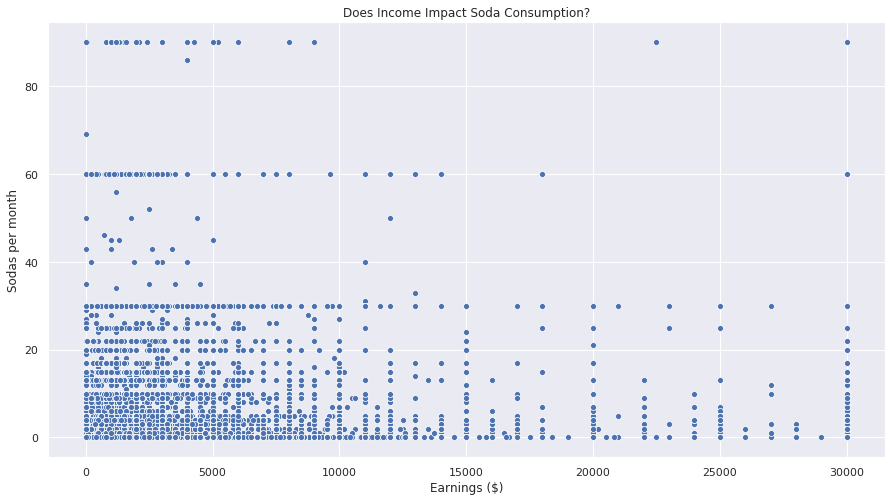

In [10]:
# Now let's plot the data again and see if there is a more visible trend.

plt.figure(figsize=(15, 8))
plt.title("Does Income Impact Soda Consumption?")
ax = sns.scatterplot(x="earnings", y="number_sodas", data=chis_df)
plt.xlabel("Earnings ($)")
plt.ylabel("Sodas per month")

# What trends do you see? Does income impact soda consumption?
# Why do you think there are certain income and soda consumption amounts that are reported more than others?

### 1.4 Data Binning - Changing Continuous Variables to Categorical Variables

Sometimes it can be useful to change a continuous variable like 'earnings' into a categorical one. This is called 'binning.'

In [11]:
# Let's first look at the distribution of the earnings data

chis_df["earnings"].quantile([0,.2,.4,.6,.8,.99])

0.00       0.00
0.20    1200.00
0.40    2600.00
0.60    5000.00
0.80    8000.00
0.99   30000.00
Name: earnings, dtype: float64

In [12]:
# Defining bin cutoffs
# Far left number is minimum, far right number is maximum
earn_bins = ( 0, 1200, 2600, 5000, 8000, 30000 )

# Defining bin labels
earn_bin_lbl = ( 'very low earnings', 'low earnings', 'moderate earnings', 'high earnings', 'very high earnings')

# Defining a new variable 'monthly earnings'
# Tip: Hold down shift and tab, and click on the command 'cut' to see more instructions from Python!
chis_df['monthly_earn'] = pd.cut( chis_df['earnings'], earn_bins, labels=earn_bin_lbl )

In [13]:
# Take a look at the dataframe now - which bin do you think $2,600 falls into?
chis_df

,number_sodas,poverty_line,health,race_eth,feel_safe,tenure,earnings,hh_income,monthly_earn
0,0.00,200-299% FPL,VERY GOOD,NON-LATINO WHITE,MOST OF THE TIME,RENT,nan,"20,000-29,999",NaN
1,0.00,300% FPL AND ABOVE,VERY GOOD,NON-LATINO WHITE,MOST OF THE TIME,OWN,nan,"120,000-129,000",NaN
2,0.00,300% FPL AND ABOVE,FAIR,NON-LATINO WHITE,ALL OF THE TIME,RENT,nan,"80,000-89,999",NaN
3,2.00,100-199% FPL,VERY GOOD,NON-LATINO WHITE,ALL OF THE TIME,OWN,nan,"30,000-39,999",NaN
4,0.00,300% FPL AND ABOVE,FAIR,NON-LATINO WHITE,SOME OF THE TIME,OWN,3000.00,"90,000-99,999",moderate earnings
5,4.00,200-299% FPL,GOOD,NON-LATINO WHITE,ALL OF THE TIME,OWN,nan,"30,000-39,999",NaN
6,30.00,200-299% FPL,GOOD,NON-LATINO AFR. AMER.,ALL OF THE TIME,RENT,1000.00,"70,000-79,999",very low earnings
7,0.00,0-99% FPL,EXCELLENT,NON-LATINO WHITE,ALL OF THE TIME,OWN,963.00,"10,000-19,999",very low earnings
8,0.00,200-299% FPL,FAIR,NON-LATINO WHITE,ALL OF THE TIME,OWN,nan,"30,000-39,999",NaN
9,2.00,300% FPL AND ABOVE,VERY GOOD,NON-LATINO WHITE,MOST OF THE TIME,RENT,3200.00,"60,000-69,999",moderate earnings


In [14]:
chis_df["monthly_earn"].value_counts().sort_index()

very low earnings     1830
low earnings          1993
moderate earnings     2720
high earnings         1703
very high earnings    2128
Name: monthly_earn, dtype: int64

Text(0.5, 0, 'Monthly Earnings')

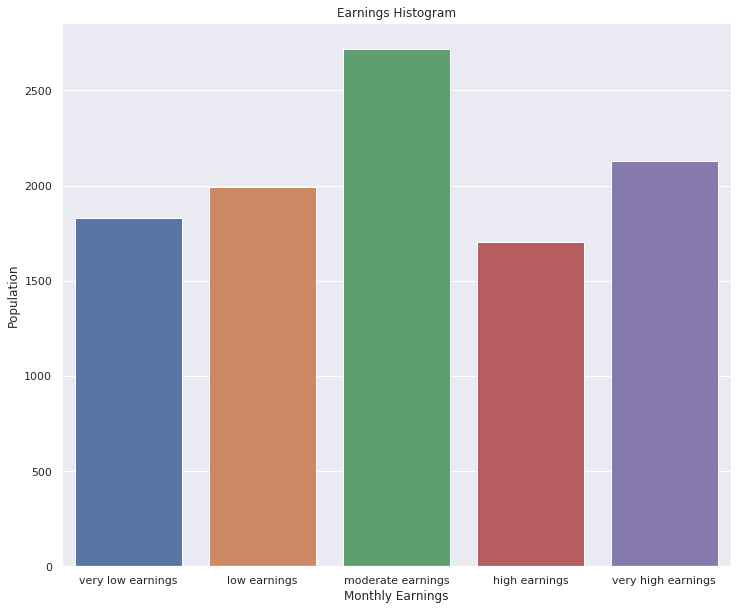

In [15]:
# Now we can take a look at monthly earnings using a histogram

sns.set()
plt.figure(figsize=(12,10))
plt.title("Earnings Histogram")
sns.countplot(chis_df['monthly_earn'])
plt.ylabel("Population")
plt.xlabel("Monthly Earnings")

In [ ]:
def earn_bins(df[x]): 
    if 0 <= x <= 1200:
        return 'very low earnings'
    elif x <= 2600: 
        return 'low earnings'
    elif x <= 5000:
        return 'modeterate earnings'
    elif x <= 8000:
        return 'high earnings'
    else:
        return 'very high earnings'

df['monthly_earn_2'] = df['earnings'].apply(earn_bins)

In [ ]:
# We could also choose to drop missing values entirely.

# chis_df.dropna(inplace=True)
#chis_df.head(15)

### 1.5 Saving A Set of Commands as a Function

Those plots were super helpful at getting a quick look at our data visually! If you want to be able to look at a graph or plot later in your code easily, it can help to save all of these commands to a specific function. 

#### Defining a Function

In [ ]:
# This assigns all of the lines of code that come after the "():" to a function called "h_race_eth"

def h_race_eth ():
    sns.set()
    plt.figure(figsize=(12,6))
    plt.title("Who Responds to CHIS?")
    plt.xticks(rotation=35)
    sns.countplot(chis_df['race_eth'])
    plt.ylabel("Population")
    plt.xlabel("Race / Ethnicity")

#### Calling a Function   
Now, we can execute all of these lines of code just by 'calling' the function name!   

This may be especially useful if you have many lines of code, and want to consult your histogram, 
or another graph or series of commands to double check your work without scrolling way back through your code.

In [ ]:
# Make sure to include () after your function name
# If you don't, what output do you get instead? Try it!

h_race_eth()

#### Advanced: Changing Parameters
The parentheses are a space for us to specify certain parameters for our function. In the code above, we've already specified everything in the body of the function, so we can leave them blank. That works great!

However, if we use stand-in variables throughout our code, we can then tell Python what we want those values to be when we call our function. This adds flexibility, so that these lines of code can be executed in a variety of ways depending on what we want to see when we call our function.

In [ ]:
# Here, we will specify the variable that the histogram draws.

def h_race_eth2 ( v ):
    sns.set()
    plt.figure(figsize=(12,6))
    plt.title("Who Responds to CHIS?")
    plt.xticks(rotation = 35)
    sns.countplot(chis_df[ v ])
    # Notice where 'v' is in the code here.
    # This determines what we have to specify below when we call the function 
    # Because v is in the place of 'race_eth', that's what we'll specify below.
    # If this was written as: sns.countplot( v ) instead, we would have to specify chis_df['race_eth'] when we call the function!
    plt.ylabel("Population")
    plt.xlabel("Race / Ethnicity")
    


In [ ]:
# Now, if we call this function, we simply tell python what column (v) we want to see.

h_race_eth2('race_eth')

In [ ]:
# We can also choose to define our parameters as regular variables, so that if we change them, the change
# applies to all functions that use them.

# For this example, we'll define what x, and y, and r should be.
# This is the kind of code that would be helpful to leave towards the top of your notebook (near your libraries)
x = 12 # width of drawing
y = 6  # height of drawing
r = 35 # degree of ration

In [ ]:
# Now, we define our function using these variables
def h_race_eth3 ( x,y,r ):
    sns.set()
    plt.figure(figsize=(x,y)) # Note x & y
    plt.title("Who Responds to CHIS?")
    plt.xticks(rotation = r) # Note r
    sns.countplot(chis_df['race_eth'])
    plt.ylabel("Population")
    plt.xlabel("Race / Ethnicity")

In [ ]:
# Now, because I've defined x, y, and r up above, I just need to tell Python to refer back to the variables, x, y & r
h_race_eth3( x,y,r )

In [ ]:
# What happens if you change the values of x, y, and r where they're defined up above?
# Change x to 15, y to 10, and r to 45

# Now run this function here - what's different?
h_race_eth3( x,y,r )

# This can be helpful so that if all of a sudden you want to see all of your figures blown up, you only have 
# to change x, y, and r in one place up at the top, as opposed to everywhere where they come up in your code.

### 1.6 (Optional) Dealing with Missing Data

Missing values in our data can make it difficult to perform statistical analysis or graph results. There are a few ways to deal with missing values, which is why it's important to think through your choices as you go, and be transparent with your audience. We could, for instance, drop missing values like we did when we graphed soda consumption. But what if we don't want to delete the data entirely?

In [ ]:
# First, let's take a look at missing values in our dataset

print( chis_df.isnull().values.any() ) # This lets us know if there are any null values
print( "---------------------------" ) # This is just to help us read the output below
print( chis_df.isnull().sum() ) # This shows us the total number of missing values for each variable

#### Pandas automatically recognizes NA and blank cells as missing, but if your dataset includes various formats for NA values, it will miss them.    
To account for this, we can tell Python what we consider missing values to be. This CHIS extract doesn't have any other odd forms of missing values, but this code could be useful if you encounter messier datasets.

In [ ]:
# Un-comment this code, and add it to the cell at the top where you define your dataframe
# missing_values = [np.nan,"n/a", "na", "--"] # Defining a list of missing value types

# We'd also have to amend our dataframe to incorporate this new definition. Here's an example:
# chis_df = pd.read_csv("chis_extract.csv", na_values = missing_values)

#### Imputing Missing Data
Our earnings variable is a float with missing nan values. While we can certainly keep it as a float, we can convert this to an integer like our practice notebook asked us to a couple weeks ago. One way to do this is by imputing the missing values (replacing them with a substitute value).

In [ ]:
# Earnings has a lot of missing values - what data type is it?
chis_df.dtypes

In [ ]:
# 'nan' values are unique to floats, which is why Python won't convert float data with 'nan' values to an integer.
# One way to work around this is to replace 'nan' values with an integer which will represent your missing data.

# Here we'll use -999999999 as a placeholder variable. 
# It's important that the placeholder is not a value that might show up as a real value - for example, if we used 0, 
# how would we know where data was missing versus where monthly income is actually zero?

chis_df["earnings"] = chis_df["earnings"].fillna(-99999999999).astype(int)

print(chis_df.dtypes)

In [ ]:
# Advanced: If you have to replace values in multiple columns, it can help to use a 'for loop'.
# Here is some code that works for the dataset in the practice notebook:

# def myfillna(series):                                       # Defining a function called 'myfillna'
    
    # for i in df.columns[6:]:                                # iterate through each 'date' column from column in index position 6 through the end
        # if series.dtype is pd.np.dtype(float):              # if series type is float
            # return series.fillna(-99999999999).astype(int)  # fill with -99999999999, and convert to integer
        # else:
            # return series

# df = df.apply(myfillna)                                     # Execute this function on my dataframe
# df

In [ ]:
chis_df.head()

In [ ]:
# Now earnings is an integer! What are some downsides of this method?
# What happens when we try to analyze this variable now?

chis_df['earnings'].describe()

In [ ]:
# Even though imputing can skew the baseline describe function, our categorical binning for 'monthly_earn' 
# above would still work if we had applied it to earnings after imputing missing values. That's because
# we set the smallest bucket to start at $0, so -9999999999 would be automatically excluded, and Python
# would designate each value of -9999999999 in 'earnings' as 'NaN' in 'monthly_earn'